### Date: 19/08/2023

Doc Link: https://scikit-learn.org/stable/modules/model_evaluation.html

In [176]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, 
                             f1_score, recall_score, 
                             precision_score, 
                             classification_report,
                             confusion_matrix)

In [177]:
# Version of the all libraries used in this project

print("Scikit-learn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)


# Scikit-learn version:  1.3.0
# matplotlib version:  3.7.2
# Pandas version:  2.0.3
# Numpy version:  1.25.2

Scikit-learn version:  1.3.0
matplotlib version:  3.7.2
Pandas version:  2.0.3
Numpy version:  1.25.2


## **Load the dataset**

In [178]:
data = datasets.load_iris()

df = pd.DataFrame(data=np.c_[data.data, data.target], columns=[list(data.feature_names) + ["target"]])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [179]:
# Change the columns name for easily accessing

df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

In [180]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [181]:
df.shape

(150, 5)

In [182]:
# Change the data type of target column

df['target'] = df['target'].astype(dtype="int32")

In [183]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [184]:
# Check the dataset is balanced or not

df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Acknowledgement: Dataset is balanced.

## Split the features and level

In [185]:
features = df.iloc[:, 0:-1]

level = df.iloc[:, -1]

In [186]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [187]:
level

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

## Apply train_test_split

In [188]:
xtrain, xtest, ytrain, ytest = train_test_split(features, level, test_size=.2, random_state=41)

## Build the machine learning model

In [189]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X=xtrain, y=ytrain)

KNeighborsClassifier(n_neighbors=13)

In [190]:
# Accuracy of the model

knn.score(X=xtest, y=ytest)

0.9666666666666667

In [191]:
knn.classes_

array([0, 1, 2])

In [192]:
y_pred = knn.predict(X=xtest)

y_pred

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1])

In [193]:
accuracy = accuracy_score(y_true=ytest, y_pred=y_pred)
accuracy

0.9666666666666667

## **Confusion Matrix**

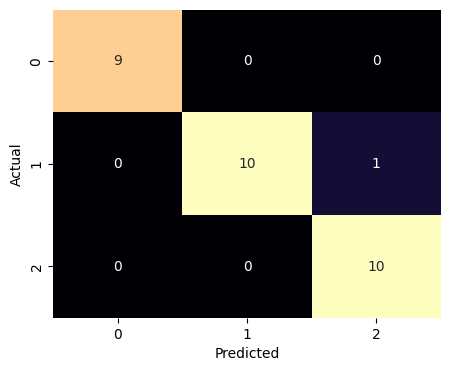

In [194]:
plt.figure(figsize=(5, 4))
matrix = confusion_matrix(y_true=ytest, y_pred=y_pred)
a = pd.DataFrame(data=matrix)
sns.heatmap(data=a, annot=True, cbar=False, cmap=plt.cm.magma)
plt.xlabel(xlabel="Predicted")
plt.ylabel(ylabel="Actual")
plt.show()

## **Precision, Recall(Sensitivity), F1-Score for individual classes**

In [195]:
def show_precision_recall_f1Score(cm, class_labels):
    # Calculate precision, recall, and F1-score from the confusion matrix
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Print precision, recall, and F1-score for each class
    for i, category in enumerate(class_labels):
        print(f"Class: {category}")
        print(f"Precision: {precision[i]}")
        print(f"Recall: {recall[i]}")
        print(f"F1-Score: {f1_score[i]}")
        print("=" * 40)

In [196]:
show_precision_recall_f1Score(cm=matrix, class_labels=knn.classes_)

Class: 0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Class: 1
Precision: 1.0
Recall: 0.9090909090909091
F1-Score: 0.9523809523809523
Class: 2
Precision: 0.9090909090909091
Recall: 1.0
F1-Score: 0.9523809523809523


## **Specificity per class**

In [197]:
def specificity_per_class(cm, class_labels):
    specificity_info = {}

    # Print precision, recall, and F1-score for each class
    for i, category in enumerate(class_labels):

        true_negatives = sum(sum(matrix) - matrix[i, :]) - matrix[:, i].sum() + matrix[i, i]
        false_positives = sum(matrix[:, i]) - matrix[i, i]
        specificity = true_negatives / (true_negatives + false_positives)
        specificity_info[category] = specificity
        
    print(specificity_info)

In [198]:
specificity_per_class(cm=matrix, class_labels=knn.classes_)

{0: 1.0, 1: 1.0, 2: 0.95}


## **Precision, Recall(Sensitivity), F1-Score Together**

In [199]:
# [None, 'micro', 'macro', 'weighted']
print("=================== For Macro Average ===================")

print("Precision score: ", precision_score(y_true=ytest, y_pred=y_pred, average="macro"))
print("Recall score: ", recall_score(y_true=ytest, y_pred=y_pred, average="macro"))
print("F1 score: ", f1_score(y_true=ytest, y_pred=y_pred, average="macro"))

print("=================== For Micro Average ===================")

print("Precision score: ", precision_score(y_true=ytest, y_pred=y_pred, average="micro"))
print("Recall score: ", recall_score(y_true=ytest, y_pred=y_pred, average="micro"))
print("F1 score: ", f1_score(y_true=ytest, y_pred=y_pred, average="micro"))

print("=================== For Weighted Average ===================")

print("Precision score: ", precision_score(y_true=ytest, y_pred=y_pred, average="weighted"))
print("Recall score: ", recall_score(y_true=ytest, y_pred=y_pred, average="weighted"))
print("F1 score: ", f1_score(y_true=ytest, y_pred=y_pred, average="weighted"))

=================== For Macro Average ===================
Precision score:  0.9696969696969697
Recall score:  0.9696969696969697
F1 score:  0.9682539682539683
=================== For Micro Average ===================
Precision score:  0.9666666666666667
Recall score:  0.9666666666666667
F1 score:  0.9666666666666667
=================== For Weighted Average ===================
Precision score:  0.9696969696969696
Recall score:  0.9666666666666667
F1 score:  0.9666666666666667


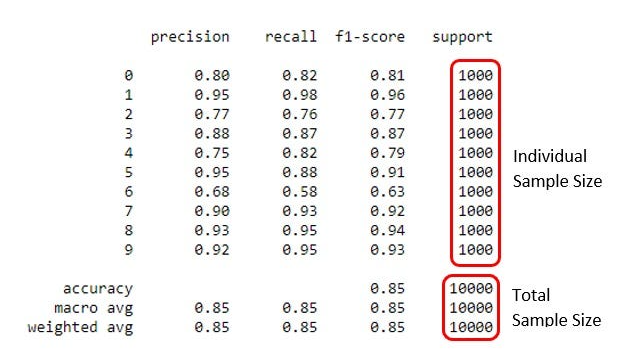

In [200]:
# Classification report

print(classification_report(y_true=ytest, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Just for understanding purpose, how to calculate this.

In [ ]:
def micro_precision(y_true, y_pred):
    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in y_true.unique():
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)

        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [ ]:
def micro_recall(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fn = 0
    
    # loop over all classes
    for class_ in y_true.unique():
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false negative for current class
        # and update overall tp
        fn += false_negative(temp_true, temp_pred)
        
    # calculate and return overall recall
    recall = tp / (tp + fn)
    return recall

In [ ]:
def micro_f1(y_true, y_pred):


    #micro-averaged precision score
    P = micro_precision(y_true, y_pred)

    #micro-averaged recall score
    R = micro_recall(y_true, y_pred)

    #micro averaged f1 score
    f1 = 2*P*R / (P + R)    

    return f1

In [ ]:
## This code for understanding purpose, how actually calculates the value


# Assuming you have true labels and predicted labels
true_labels = [...]  # True labels for the samples
predicted_labels = [...]  # Predicted labels by the classifier

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate sum of true positives and sum of false positives
sum_true_positives = conf_matrix.diagonal().sum()
sum_false_positives = conf_matrix.sum() - sum_true_positives

# Calculate micro-averaging precision
micro_precision = sum_true_positives / (sum_true_positives + sum_false_positives)

print("Micro-Averaging Precision:", micro_precision)
